In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [5]:
df = sns.load_dataset('titanic')[['age','fare','survived']]

In [6]:
df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [7]:
df.isnull().sum()

age         177
fare          0
survived      0
dtype: int64

In [8]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [9]:
df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [11]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]

In [12]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train.shape

(712, 2)

C:\Users\Abhishek Kumar\AppData\Local\Temp\ipykernel_18440\2221707200.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['age'])


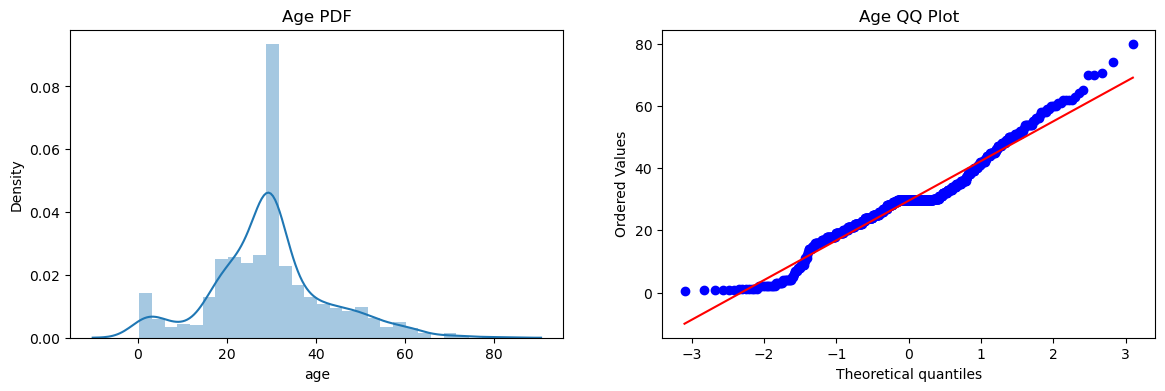

In [23]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\Abhishek Kumar\AppData\Local\Temp\ipykernel_18440\3421614915.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['fare'], ax=ax1)


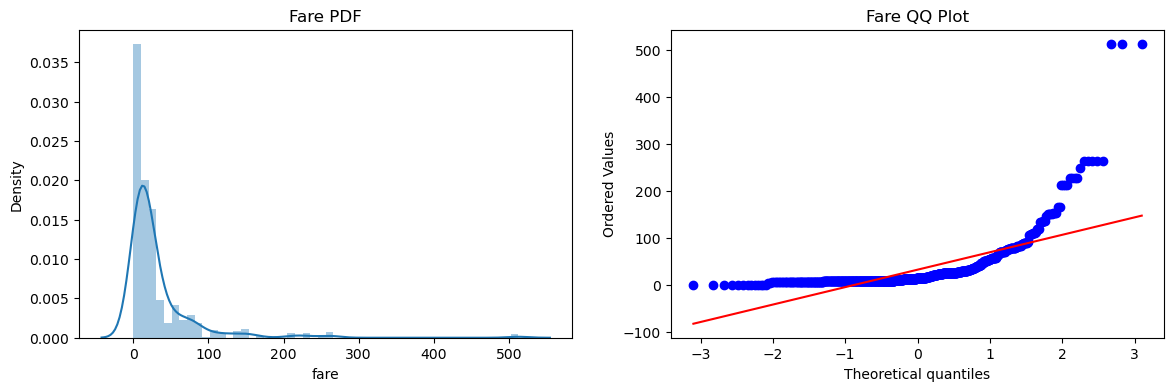

In [29]:
# plt.figure(figsize=(14,4))
# plt.subplot(121)
# sns.distplot(X_train['fare'])
# plt.title('Fare PDF')

# plt.subplot(122)
# stats.probplot(X_train['fare'], dist="norm", plot=plt)
# plt.title('Fare QQ Plot')

# plt.show()

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(14,4))
sns.distplot(X_train['fare'], ax=ax1)
ax1.set_title('Fare PDF')
stats.probplot(X_train['fare'], dist="norm", plot=ax2)
ax2.set_title('Fare QQ Plot')
plt.show()

In [31]:
clf_lr = LogisticRegression()
clf_dt = DecisionTreeClassifier()

In [32]:
clf_lr.fit(X_train,y_train)
clf_dt.fit(X_train,y_train)
    
y_pred_lr = clf_lr.predict(X_test)
y_pred1_dt = clf_dt.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred_lr))
print("Accuracy DT",accuracy_score(y_test,y_pred1_dt))

Accuracy LR 0.6480446927374302
Accuracy DT 0.664804469273743


In [33]:
trf = FunctionTransformer(func=np.log1p)

In [34]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [35]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6703910614525139


In [37]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6532459425717854


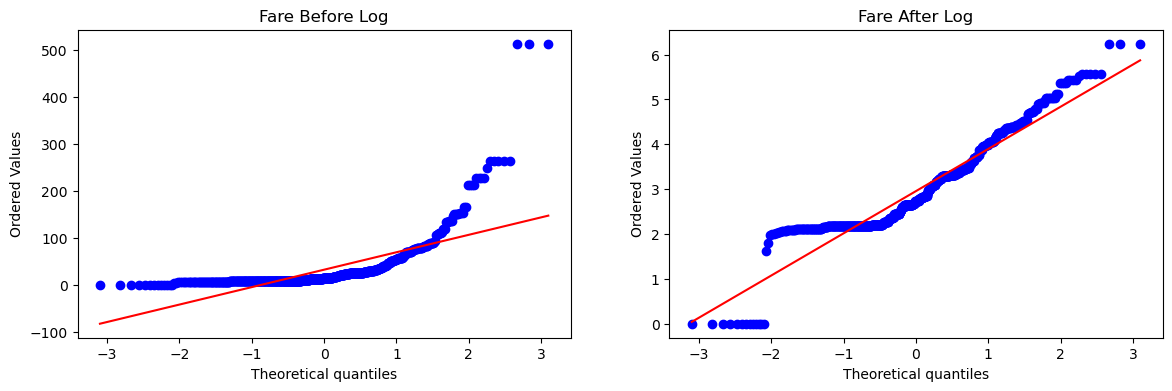

In [39]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

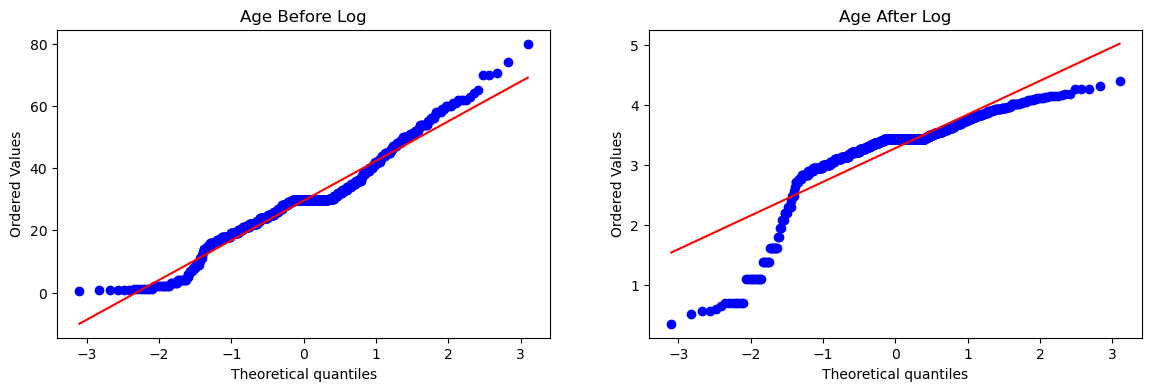

In [40]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [41]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [42]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6703910614525139


In [43]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6577028714107366


In [44]:
def apply_transform(transform):
    X = df.iloc[:,1:2]
    y = df.iloc[:,2]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6071785268414482


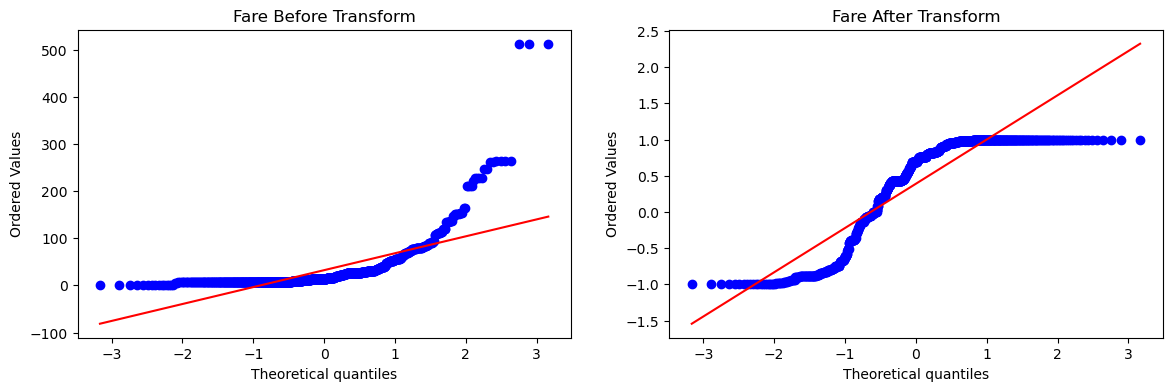

In [49]:
apply_transform(np.sin)